In [1]:
# 2022-02-28 yying2@
import numpy as np
import math

In [15]:
def read_data(f):
    dataset = np.loadtxt(f, delimiter='\t', comments=None, encoding='utf-8',dtype=np.float64)
    return dataset

In [3]:
def prepare_data(data):
    theta = np.zeros(data.shape[1],dtype=np.float64)
    y_actual = data[:, 0].copy()
    data[:,0] = 1
    return theta,y_actual,data.copy()

In [4]:
def sigmoid(theta, x):
    dotprod_output = np.dot(x, theta)
    e = np.exp(dotprod_output)
    return e / (1 + e)

In [5]:
def predict(theta, X):
    # TODO: Implement `predict` using vectorization
    prediction = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        if sigmoid(theta,X[i]) > 0.5:
            prediction[i] = 1
    return prediction

In [6]:
def train(theta, X, y, num_epoch, learning_rate):
    # TODO: Implement `train` using vectorization
    N = X.shape[0]
    for ep in range(int(num_epoch)):
        for i in range(len(X)):
            J_theta_d = - X[i].T.dot(y[i]-sigmoid(theta,X[i]))
            theta = theta - learning_rate*J_theta_d
    return theta

In [7]:
def compute_error(y_pred, y):
    # TODO: Implement `compute_error` using vectorization
    total = len(y)
    error = 0.0
    for i in range(total):
        if round(float(y[i]),5) != round(float(y_pred[i]),5):
            error+=1
    return '{:.6f}'.format(round(error/total,6))

In [ ]:
def phi_matrix(theta, xi):
    return math.exp(theta.dot(xi))/(1+math.exp(theta.dot(xi)))

In [8]:
def train1(theta, X, y, num_epoch, learning_rate):
    N = X.shape[0]
    ll = []
    for ep in range(int(num_epoch)):
        for i in range(len(X)):
            J_theta_d = - X[i].T.dot(y[i]-sigmoid(theta,X[i]))
            theta = theta - learning_rate*J_theta_d
        scores = np.dot(X, theta)
        ll.append(np.sum(- y*scores + np.log(1 + np.exp(scores)))/N)
    return theta,ll

In [ ]:
#7.1
training_l = []
validation_l = []
data = ["largeoutput/model1_formatted_train.tsv","largeoutput/model1_formatted_valid.tsv"]
for i in range(2):
    dt = read_data(data[i])
    theta_original,y,X = prepare_data(dt)
    theta_final, ll = train1(theta_original, X, y, 5000, 0.00001)
    if i == 0:
        training_l = ll.copy()
    else:
        validation_l = ll.copy()

In [ ]:
import matplotlib.pyplot as plt
num_epoch = list(range(5000))
plt.plot(num_epoch, training_l,'b',label="Training: log-likelihood")
plt.plot(num_epoch, validation_l,'r',label="Validate: log-likelihood")
# plt.ylim(0, 0.6)
plt.xlim(0,5000)
plt.legend(loc="upper center")
plt.savefig('7_1.png')
plt.show()

In [22]:
## 7.4
data_train = ["largeoutput/model1_formatted_train.tsv","largeoutput/model2_formatted_train.tsv"]
data_test = ["largeoutput/model1_formatted_test.tsv","largeoutput/model2_formatted_test.tsv"]
errors = []
i = 0
dt = read_data(data_train[i])
print(data_train[i])
theta_original,y,X = prepare_data(dt)
theta_final = train(theta_original, X, y,5000, 0.00001)
y_hat= predict(theta_final,X)
error = compute_error(y_hat,y)
errors.append(error)
dt1 = read_data(data_test[i])
print(data_test[i])
theta_original,y,X = prepare_data(dt1)
y_hat= predict(theta_final,X)
error = compute_error(y_hat,y)
errors.append(error)

largeoutput/model1_formatted_train.tsv
largeoutput/model1_formatted_test.tsv


In [23]:
errors

['0.000000', '0.140000']

In [19]:
#7.5
training_1 = []
training_2 = []
training_3 = []
a = [0.0001,0.00001,0.000001]
# data = ["largeoutput/model1_formatted_train.tsv","largeoutput/model1_formatted_valid.tsv"]
dt = read_data("largeoutput/model1_formatted_train.tsv")
theta_original,y,X = prepare_data(dt)
for i in range(3):
    print(i)
    theta_final, ll = train1(theta_original, X, y, 5000, a[i])
    if i == 0:
        training_1 = ll.copy()
    elif i ==1:
        training_2 = ll.copy()
    else:
        training_3 = ll.copy()

0
1
2


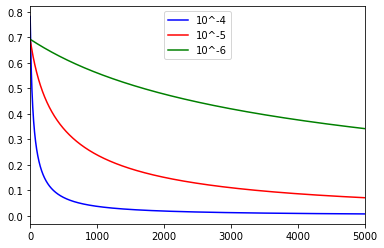

In [20]:
num_epoch = list(range(5000))
plt.plot(num_epoch, training_1,'b',label="10^-4")
plt.plot(num_epoch, training_2,'r',label="10^-5")
plt.plot(num_epoch, training_3,'g',label="10^-6")
# plt.ylim(0, 0.6)
plt.xlim(0,5000)
plt.legend(loc="upper center")
plt.savefig('7_5.png')
plt.show()

In [13]:
#7.7
model_3 = read_data("model3_val_nll.txt")
model_3_val = model_3[:, 1].copy()

In [16]:
dt = read_data("largeoutput/model1_formatted_valid.tsv")
theta_original,y,X = prepare_data(dt)
theta_final, ll = train1(theta_original, X, y, 5000, 0.00001)
model_1_val = ll.copy()
dt = read_data("largeoutput/model2_formatted_valid.tsv")
theta_original,y,X = prepare_data(dt)
theta_final, ll = train1(theta_original, X, y, 5000, 0.00001)
model_2_val = ll.copy()

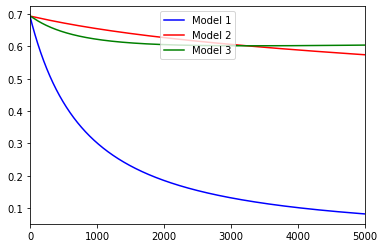

In [18]:
import matplotlib.pyplot as plt
num_epoch = list(range(5000))
plt.plot(num_epoch, model_1_val,'b',label="Model 1")
plt.plot(num_epoch, model_2_val,'r',label="Model 2")
plt.plot(num_epoch, model_3_val,'g',label="Model 3")
# plt.ylim(0, 0.6)
plt.xlim(0,5000)
plt.legend(loc="upper center")
plt.savefig('7_7.png')
plt.show()

In [ ]:
def main(train_in,val_in,test_in,train_out,test_out,metric_out,epoch,rate):
    data_input = [train_in,test_in]
    data_output = [train_out,test_out]
    errors = []
    for i in range(len(data_input)):
        dt = read_data(data_input[i])
        theta_original,y,X = prepare_data(dt)
        if i == 0:
            theta_final = train(theta_original, X, y, int(epoch), float(rate))
        y_hat= predict(theta_final,X)
        error = compute_error(y_hat,y)
        errors.append(error)
        np.savetxt(data_output[i], y_hat, delimiter=",",fmt="%i")
    with open(metric_out, 'w') as f_out:
        f_out.write("error(train): "+str(errors[0])+"\n")
        f_out.write("error(test): "+str(errors[1]))

In [ ]:
if __name__ == '__main__':
    import sys
    import numpy as np
    main(sys.argv[1],sys.argv[2],sys.argv[3],sys.argv[4],sys.argv[5],sys.argv[6],sys.argv[7],sys.argv[8])